# Import the Packages

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Lasso

# Reading the data

In [24]:
data=pd.read_csv('car_age_price.csv')
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [25]:
data.shape

(112, 2)

In [26]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


# Finding the unique values

In [28]:
data['Price'].unique()

array([465000, 755000, 700000, 350000, 425000, 575000, 509999, 500000,
       600000, 475000, 550000, 434999, 650000, 450000, 486000, 545000,
       525000, 396000, 325000, 345000, 341000, 490000, 540000, 595000,
       495000, 400000, 300000, 320000, 409999, 390000, 480000, 520000,
       640000, 375000, 420000], dtype=int64)

In [29]:
data['Price'].nunique()

35

# Distribution of data

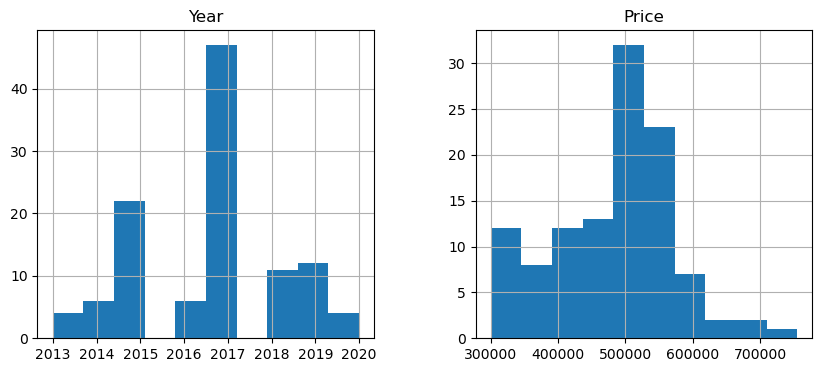

In [30]:
freqgraph=data.select_dtypes(include=['int64'])
freqgraph.hist(figsize=(10,4))
plt.show()

# Correlation matrix

<AxesSubplot:>

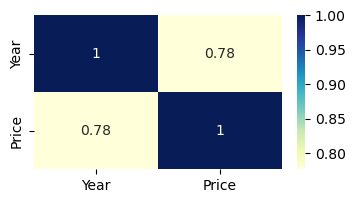

In [31]:
corrmatrix=data.corr()
plt.subplots(figsize=(4,2))
#Heatmap of the correlation matrix
sns.heatmap(corrmatrix,annot=True,cmap='YlGnBu')

# Splitting the data 

In [32]:
#Target column
y=data['Price']
#Reshaping the feature column to a 2D array
X=np.array(data['Year']).reshape(-1,1)


#Splitting the data into training and testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)

# Linear Regression

In [34]:
lr=linear_model.LinearRegression()
#Fit the linear regression model
model_lin=lr.fit(X_train,y_train)


In [35]:
y_pred=model_lin.predict(X_test)  

In [36]:
#Finding the metrics value

print('MSE is:',mean_squared_error(y_test,y_pred))
print('R2 is:',r2_score(y_test,y_pred))

MSE is: 3878767151.0727544
R2 is: 0.43479616321090353


# Predicting future values using linear regression

In [37]:
def price_of_car(year):
    value=model_lin.predict(np.array(year).reshape(-1,1))
    return (value[[0]])

year_of_car=int(input('Enter the model of the car:'))
print('The price of the car will be:',price_of_car(year_of_car))

Enter the model of the car:2022
The price of the car will be: [740160.11937766]


In [ ]:
#The price of the 2022 model second-hand grand i10 car is 740160.11937766

# Lasso Regression

In [33]:
#Splitting the data into training and testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)


#Create an instance of lasso regression implementation
lasso=Lasso(alpha=1.0)

#Fit the lasso model
lasso.fit(X_train,y_train)


y_pred=lasso.predict(X_test)

#Finding the metrics value
print('MSE is:',mean_squared_error(y_test,y_pred))
print('R2 is:',r2_score(y_test,y_pred))


MSE is: 3878735896.222091
R2 is: 0.4348007175862566


In [144]:
#The metrics value of linear regression model and lasso regression model are somewhat similar.It implies that performance of both the models i.e., linear and lasso are somewhat similar.